# I. Data Preparation (equal bin)

The goal of this dataset is to clean the data set we'll use for data visualizations and training the model.

We'll proceed to:
- Data Exploration and data split
- Feature Engineering (categorical encoding using equal bin discretiser and top/bottom encoding)
- Save data for feature predictions


## Part I : Data Exploratoin

####  1. Importing libraries and data

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


#Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



#### 2. Import and merge datasets

In [2]:
#import first data set
autos=pd.read_csv('autos.csv',sep=',')
autos.shape

(216, 26)

In [3]:
#View data
autos.head(2)

,symboling,normalized-losses,make-id,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [4]:
#import second data set
makes=pd.read_csv('makes.csv',sep=',')
makes.shape

(22, 2)

In [5]:
# Merge the two datasets
df= pd.concat([autos,makes],axis=1)
df.shape

(216, 28)

In [6]:
#column list
df.columns

Index(['symboling', 'normalized-losses', 'make-id', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make-id', 'make'],
      dtype='object')

I can foresee problems when dealing with problems with a - sign, so I shall replace it by a lower case _.

In [7]:
old_names = ['symboling', 'normalized-losses', 'make-id', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make-id', 'make'] 
new_names = ['symboling', 'normalized_losses', 'make_id', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'make_id', 'make']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [8]:
df.head()

,symboling,normalized_losses,make_id,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_id,make
0,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1.0,alfa-romero
1,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,2.0,audi
2,1,NaN,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,3.0,bmw
3,2,164.0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4.0,chevrolet
4,2,164.0,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5.0,dodge


In [9]:
df.columns

Index(['symboling', 'normalized_losses', 'make_id', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'make_id', 'make'],
      dtype='object')

#### 3. Drop duplicate rows and columns

In [10]:
#drop duplicate rows (using subset, I drop raws where values of columns mentioned match)
df.drop_duplicates(subset=['symboling', 'normalized_losses', 'make_id', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'make_id', 'make'], inplace = True)

In [11]:
#see shape after duplicate row removal
df.shape

(205, 28)

I had 11 duplicates that have been removed

In [12]:
# remove duplicate columns
_, i = np.unique(df.columns, return_index=True)
df=df.iloc[:, i]
df.shape

(205, 27)

In [13]:
df.head()

,aspiration,body_style,bore,city_mpg,compression_ratio,curb_weight,drive_wheels,engine_location,engine_size,engine_type,fuel_system,fuel_type,height,highway_mpg,horsepower,length,make,make_id,normalized_losses,num_of_cylinders,num_of_doors,peak_rpm,price,stroke,symboling,wheel_base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,mpfi,gas,48.8,27,111.0,168.8,alfa-romero,1,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,mpfi,gas,48.8,27,111.0,168.8,audi,1,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,mpfi,gas,52.4,26,154.0,171.2,bmw,1,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,mpfi,gas,54.3,30,102.0,176.6,chevrolet,2,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,mpfi,gas,54.3,22,115.0,176.6,dodge,2,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4


#### 4. Types of Variables

In [14]:
# let's inspect the type of variables in pandas
df.dtypes

aspiration            object
body_style            object
bore                 float64
city_mpg               int64
compression_ratio    float64
curb_weight            int64
drive_wheels          object
engine_location       object
engine_size            int64
engine_type           object
fuel_system           object
fuel_type             object
height               float64
highway_mpg            int64
horsepower           float64
length               float64
make                  object
make_id                int64
normalized_losses    float64
num_of_cylinders      object
num_of_doors          object
peak_rpm             float64
price                float64
stroke               float64
symboling              int64
wheel_base           float64
width                float64
dtype: object

There are a mixture of numerical and categorical variables. Normally object type determines categorical. 

#### 4.1 Find categorical variables

In [15]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 10 categorical variables


['aspiration',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'fuel_system',
 'fuel_type',
 'make',
 'num_of_cylinders',
 'num_of_doors']

#### 4.2 Find temporal variables

In [16]:
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!='O']

# list of variables that contain year information
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var or 'Day'in var or 'Month'in var or 'Time'in var]
print('There are {} temporal variables'.format(len(year_vars)))


year_vars

There are 0 temporal variables


[]

No temporal variables

#### 4.3 Find Discrete Varibles

In [17]:
# let's visualise the values of the discrete variables
discrete = []

for var in numerical:
    if len(df[var].unique())<20 and var not in year_vars:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))
discrete

symboling  values:  [ 3  1  2  0 -1 -2]

There are 1 discrete variables


['symboling']

In [18]:
### Find Continuous
# let's remember to skip the Id variable and the target variable SalePrice, which are both also numerical

numerical = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice'] and var not in year_vars]
print('There are {} numerical and continuous variables'.format(len(numerical)))
numerical

There are 16 numerical and continuous variables


['bore',
 'city_mpg',
 'compression_ratio',
 'curb_weight',
 'engine_size',
 'height',
 'highway_mpg',
 'horsepower',
 'length',
 'make_id',
 'normalized_losses',
 'peak_rpm',
 'price',
 'stroke',
 'wheel_base',
 'width']

SO there are: 

- 1 discrete variables 
- 10 categorical 
- 0 temporal
- 16 continuous


#### 5.Types of problems within variables

#### 5.1 Missing values

I have very few missing values in general, except for the 'normalized-losses'and 'make'columns

In [19]:
# let's no determine how many variables we have with missing information

vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]
print('Total variables that contain missing information: ', len(vars_with_na))

Total variables that contain missing information:  8


There are a few variables with a lot of missing information, let's find out what kind of variables they are

In [20]:
# let's inspect the type of those variables with a lot of missing information
for var in df.columns:
    if df[var].isnull().mean()>0.80:
        print(var, df[var].unique())

make ['alfa-romero  ' 'audi  ' 'bmw  ' 'chevrolet  ' 'dodge  ' 'honda  '
 'isuzu  ' 'jaguar  ' 'mazda  ' 'mercedes-benz  ' 'mercury  '
 'mitsubishi  ' 'nissan  ' 'peugot  ' 'plymouth  ' 'porsche  ' 'renault  '
 'saab  ' 'subaru  ' 'toyota  ' 'volkswagen  ' 'volvo ' nan]


In [21]:
# let's visualise the percentage of missing values for each variable
for var in df.columns:
    if df[var].isnull().sum()>0:
        print(var, df[var].isnull().mean())

bore 0.01951219512195122
horsepower 0.00975609756097561
make 0.8926829268292683
normalized_losses 0.2
num_of_doors 0.00975609756097561
peak_rpm 0.00975609756097561
price 0.01951219512195122
stroke 0.01951219512195122


One variable with more than 80% missing values, it's categorical

#### 5.2 Outliers

#### 5.2.1 Start with numerical continuous

In [22]:
# let's look at the numerical variables
numerical

['bore',
 'city_mpg',
 'compression_ratio',
 'curb_weight',
 'engine_size',
 'height',
 'highway_mpg',
 'horsepower',
 'length',
 'make_id',
 'normalized_losses',
 'peak_rpm',
 'price',
 'stroke',
 'wheel_base',
 'width']

The only real continuous numerical variable is DepDelay, the others are discrete or categorical (ID)

#### 5.2.2 Continue with discrete variables

We know discrete varibles are: 

     - Symboling
    
    Actually, looking at the dataset, we can see antoher discrete variable (with more than 20 values)
    
    - make_id

In [23]:
discrete = ['symboling','make_id']

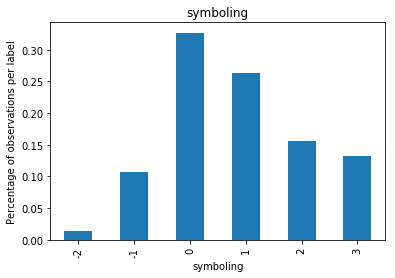

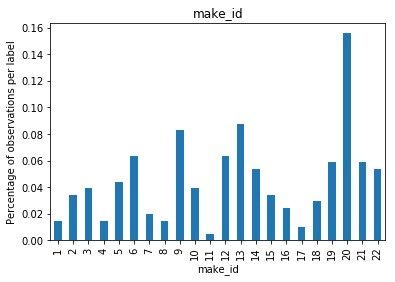

In [24]:
# outlies in discrete variables
for var in discrete:
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

#### 5.2.3 Number of labels: Cardinality

Text(0, 0.5, 'Number of different categories')

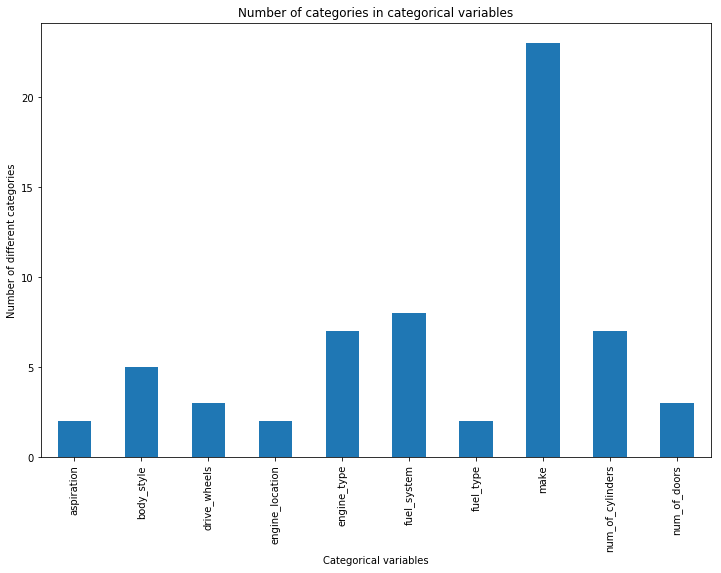

In [25]:
no_labels_ls = []
for var in categorical:
    no_labels_ls.append(len(df[var].unique()))
    
 
tmp = pd.Series(no_labels_ls)
tmp.index = pd.Series(categorical)
tmp.plot.bar(figsize=(12,8))
plt.title('Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')

Most of them have a few variables, except for make

**5.2.4 Outliers in Continuous**

To be seen later

####  6. Split into train and test sets

In [26]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(df, df.price, test_size=0.15,
                                                    random_state=0)
X_train.shape, X_test.shape

((174, 27), (31, 27))

## Part II: Feature engineering

### 7. Engineering missing values

**7.1 Continuous variables**

In [27]:
# print variables with missing data
# keep in mind that now that we created those new temporal variables, we
# are going to treat them as numerical and continuous as well:


# examine percentage of missing values
for col in numerical+year_vars:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

bore 0.017241379310344827
normalized_losses 0.1839080459770115
price 0.011494252873563218
stroke 0.017241379310344827


**Bore, stroke, price** and stroke missing values are less than 5%: median imputation

**normalized losses** missing values are more than 5%: additional variable to capture NA + median imputation    

In [28]:
# add variable indicating missingness + median imputation
for df in [X_train, X_test]:
    for var in ['normalized_losses']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
        df[var].fillna(X_train[var].median(), inplace=True) 

for df in [X_train, X_test]:
    df['normalized_losses'].fillna(X_train['normalized_losses'].median(), inplace=True)
    df['price'].fillna(X_train.price.median(), inplace=True)
    df['stroke'].fillna(X_train.stroke.median(), inplace=True)


    
    

**7.2 Discrete variables**

In [29]:
# print variables with missing data
for col in discrete:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())
    print(discrete)

['symboling', 'make_id']
['symboling', 'make_id']


There are no discrete variables variables with missing data



#### 7.3 Engineering Missing data in Categorical Variables

In [30]:
# print variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

make 0.896551724137931
num_of_doors 0.011494252873563218


In [31]:
X_train[categorical].head()

,aspiration,body_style,drive_wheels,engine_location,engine_type,fuel_system,fuel_type,make,num_of_cylinders,num_of_doors
193,std,wagon,fwd,front,ohc,mpfi,gas,NaN,four,four
125,std,hatchback,rwd,front,ohc,mpfi,gas,NaN,four,two
173,std,sedan,fwd,front,ohc,mpfi,gas,NaN,four,four
92,std,sedan,fwd,front,ohc,2bbl,gas,NaN,four,four
16,std,sedan,rwd,front,ohc,mpfi,gas,renault,six,two


For the 'make'variable, I have over 89% of missing values. I shall delete this variable.

As for 'num-of-doors', missing values are less than 5%, so I shall replace them with the most frequent category

In [32]:
#remove 'make'
X_train = X_train.drop('make', axis = 1)
X_test = X_test.drop('make', axis = 1)


In [33]:
# find most frequent category in 'num-of-doors'
X_train.groupby(['num_of_doors'])['num_of_doors'].count().sort_values(ascending=False).index[0]

'four'

In [34]:
# let's create a variable to replace NA with the most frequent label
# both in train and test set

def impute_na(df_train, df_test, variable):
    most_frequent_category = df_train.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df_train[variable].fillna(most_frequent_category, inplace=True)
    df_test[variable].fillna(most_frequent_category, inplace=True)

In [35]:
# and let's replace the NA
for variable in ['num_of_doors',]:
    impute_na(X_train, X_test, variable)

Finally let's check I have no more nulls

In [36]:
# check absence of null values
for var in X_train.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

bore 3


In [37]:
# check absence of null values
for var in X_test.columns:
    if X_test[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

bore 3
horsepower 0
peak_rpm 0


These are variables with null on the test set and not in the training set. I shall fill NA with median value

In [38]:
## find most frequent category in 'horsepower'
X_train.groupby(['horsepower'])['horsepower'].count().sort_values(ascending=False).index[0]

68.0

In [39]:
## find most frequent category in 'peak-rpm'
X_train.groupby(['peak_rpm'])['peak_rpm'].count().sort_values(ascending=False).index[0]

5500.0

In [40]:
## find most frequent category in 'peak-rpm'
X_train.groupby(['bore'])['bore'].count().sort_values(ascending=False).index[0]

3.62

In [41]:
X_test['horsepower'].fillna(68, inplace = True)
X_test['peak_rpm'].fillna(5500, inplace = True)
X_test['bore'].fillna(3.62, inplace = True)
X_train['bore'].fillna(3.62, inplace = True)




In [42]:
# check absence of null values
for var in X_train.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

In [43]:
# check absence of null values
for var in X_test.columns:
    if X_test[var].isnull().sum()>0:
        print(var, X_test[var].isnull().sum())

In [44]:
X_train.isnull().sum()

aspiration              0
body_style              0
bore                    0
city_mpg                0
compression_ratio       0
curb_weight             0
drive_wheels            0
engine_location         0
engine_size             0
engine_type             0
fuel_system             0
fuel_type               0
height                  0
highway_mpg             0
horsepower              0
length                  0
make_id                 0
normalized_losses       0
num_of_cylinders        0
num_of_doors            0
peak_rpm                0
price                   0
stroke                  0
symboling               0
wheel_base              0
width                   0
normalized_losses_NA    0
dtype: int64

In [45]:
X_test.isnull().sum()

aspiration              0
body_style              0
bore                    0
city_mpg                0
compression_ratio       0
curb_weight             0
drive_wheels            0
engine_location         0
engine_size             0
engine_type             0
fuel_system             0
fuel_type               0
height                  0
highway_mpg             0
horsepower              0
length                  0
make_id                 0
normalized_losses       0
num_of_cylinders        0
num_of_doors            0
peak_rpm                0
price                   0
stroke                  0
symboling               0
wheel_base              0
width                   0
normalized_losses_NA    0
dtype: int64

Well done! I have no more NA in the variables.

### 8. Outlier engineering

#### 8.1 Outlier identification and strategy setting


In [46]:
numerical

['bore',
 'city_mpg',
 'compression_ratio',
 'curb_weight',
 'engine_size',
 'height',
 'highway_mpg',
 'horsepower',
 'length',
 'make_id',
 'normalized_losses',
 'peak_rpm',
 'price',
 'stroke',
 'wheel_base',
 'width']

In [47]:
# Note I remove the price as it is the target
numerical = ['bore',
 'city_mpg',
 'compression_ratio',
 'curb_weight',
 'engine_size',
 'height',
 'highway_mpg',
 'horsepower',
 'length',
 'make_id',
 'normalized_losses',
 'peak_rpm',
 'stroke',
 'wheel_base',
 'width']

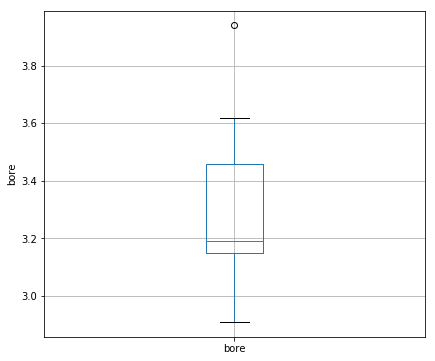

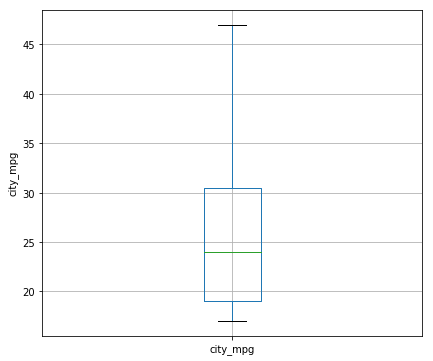

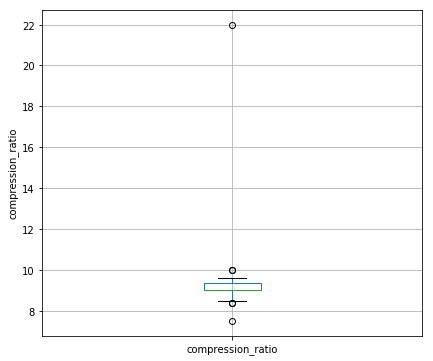

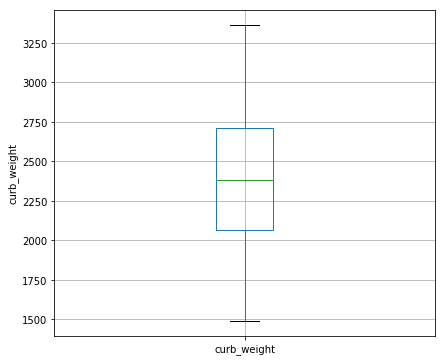

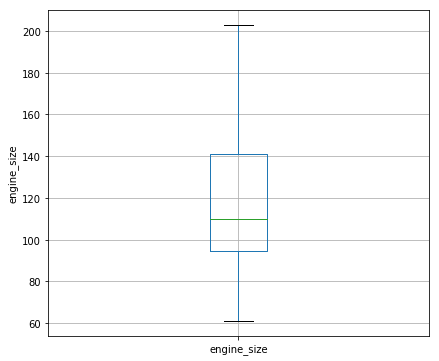

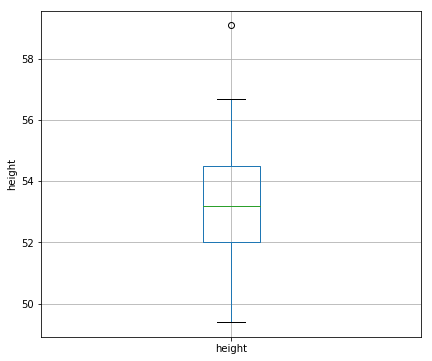

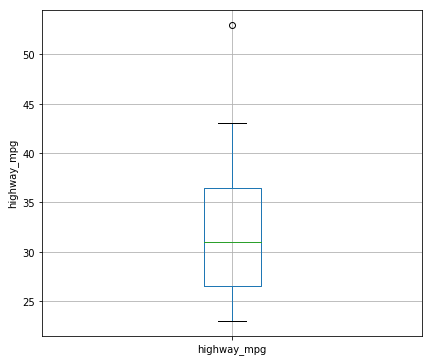

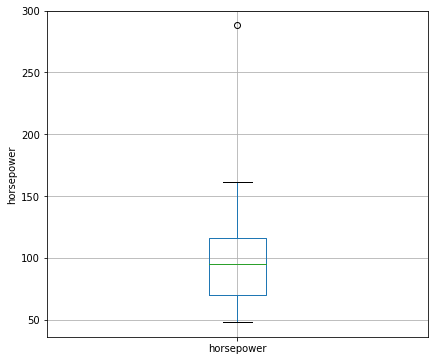

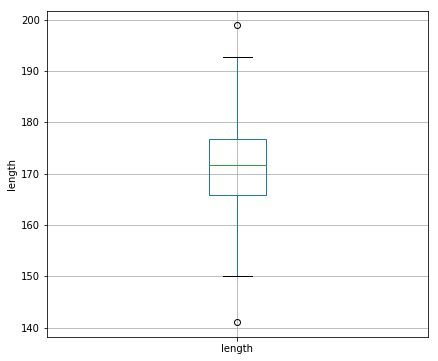

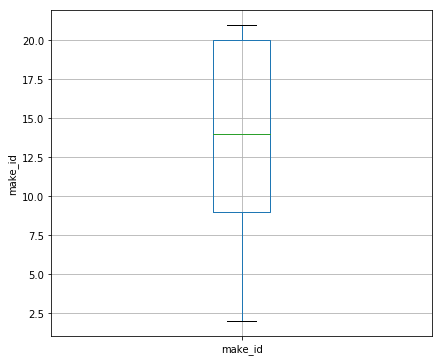

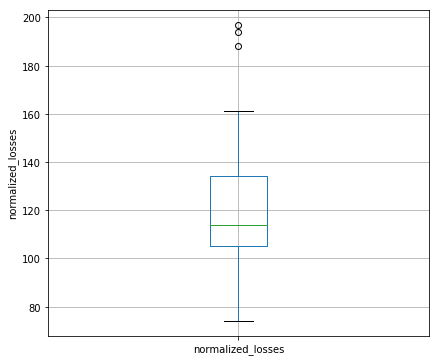

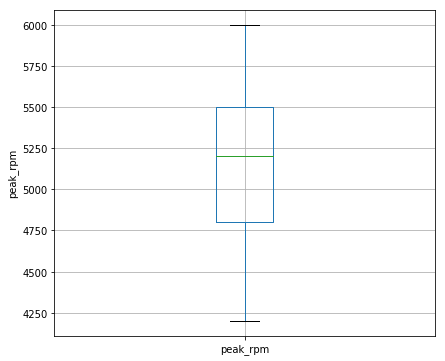

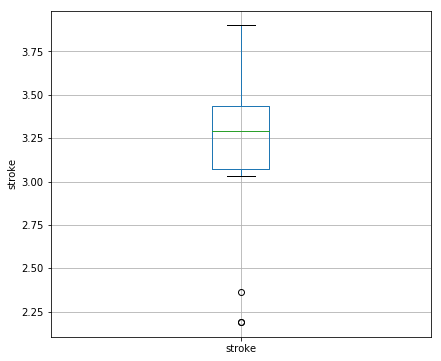

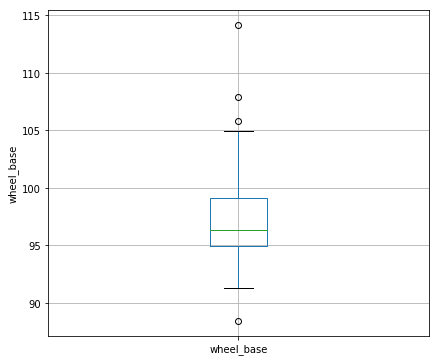

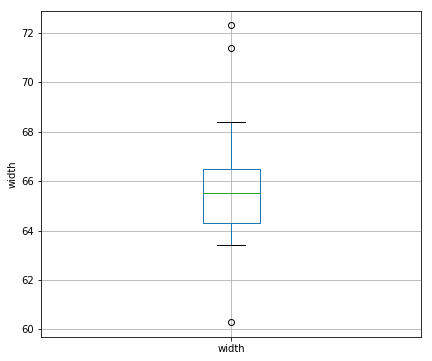

In [48]:
for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)

The variables presenting outliers are:
    - bore (top)
    - compression_ratio (both)
    - Height (top)
    - highway_mpg (top)
    - horse_power (top)
    - lenght (both)
    - normalized_losses (top)
    - stroke (bottom)
    - wheel_base (both)
    - width (both)
   

In [49]:
# let's find the skewness of above variables
for var in ['bore',
 'compression_ratio',
 'height',
 'highway_mpg',
 'horsepower',
 'length',
 'normalized_losses',
 'stroke',
 'wheel_base',
 'width']:
    print(var, 'skewness is', df[var].skew() )

bore skewness is 0.6257923004524101
compression_ratio skewness is 5.190962998330603
height skewness is 0.27350172478135837
highway_mpg skewness is 0.954946036021284
horsepower skewness is 2.4448428600495635
length skewness is -0.16070860345381996
normalized_losses skewness is 0.8716855672848831
stroke skewness is -1.212937019722827
wheel_base skewness is 1.2071569265180229
width skewness is 0.8650397680572235


If we consider an absolute value of 1 to be normal skewness. 

I shall deal with outliers as follows:

    - Equal binning for variables with a skewness above 1:
        - stroke -done
        - horsepower -done
        - compression_ratio - not yet
        - wheel_balse -not yet
        
    - Bottom/top capping for others. 

#### 8.2 Equal binning

In [50]:
# and now, I will divide into 10 quantiles for the rest of the exercise. I will leave the quantile
# boundary and generate labels as well for comparison

# create 10 labels, one for each quantile
labels = ['Q'+str(i+1) for i in range(0,10)]
print(labels)


# bins with labels
X_train['stroke_label'], bins = pd.qcut(x=X_train.stroke, q=10, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['stroke_disc'], bins = pd.qcut(x=X_train.stroke, q=10, retbins=True, precision=3, duplicates='raise')

# bins with labels
X_train['horsepower_label'], bins = pd.qcut(x=X_train.horsepower, q=10, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['horsepower_disc'], bins = pd.qcut(x=X_train.horsepower, q=10, retbins=True, precision=3, duplicates='raise')

# bins with labels
X_train['wheel_base_label'], bins = pd.qcut(x=X_train.wheel_base, q=10, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['wheel_base_disc'], bins = pd.qcut(x=X_train.wheel_base, q=10, retbins=True, precision=3, duplicates='raise')




X_train.head(10)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']


,aspiration,body_style,bore,city_mpg,compression_ratio,curb_weight,drive_wheels,engine_location,engine_size,engine_type,fuel_system,fuel_type,height,highway_mpg,horsepower,length,make_id,normalized_losses,num_of_cylinders,num_of_doors,peak_rpm,price,stroke,symboling,wheel_base,width,normalized_losses_NA,stroke_label,stroke_disc,horsepower_label,horsepower_disc,wheel_base_label,wheel_base_disc
193,std,wagon,3.19,25,9.0,2563,fwd,front,109,ohc,mpfi,gas,55.1,31,88.0,183.1,21,114.0,four,four,5500.0,12290.0,3.40,0,100.4,66.9,1,Q7,"(3.39, 3.4]",Q4,"(77.8, 88.0]",Q7,"(98.8, 100.4]"
125,std,hatchback,3.94,19,9.5,2778,rwd,front,151,ohc,mpfi,gas,50.2,27,143.0,168.9,16,186.0,four,two,5500.0,22018.0,3.11,3,94.5,68.3,0,Q3,"(3.07, 3.15]",Q9,"(140.8, 160.0]",Q2,"(93.7, 94.5]"
173,std,sedan,3.31,29,8.7,2326,fwd,front,122,ohc,mpfi,gas,54.9,34,92.0,175.6,20,65.0,four,four,4200.0,8948.0,3.54,-1,102.4,66.5,0,Q9,"(3.46, 3.54]",Q5,"(88.0, 95.0]",Q8,"(100.4, 103.5]"
92,std,sedan,3.15,31,9.4,1938,fwd,front,97,ohc,2bbl,gas,54.5,37,69.0,165.3,13,122.0,four,four,5200.0,6849.0,3.29,1,94.5,63.8,0,Q5,"(3.23, 3.29]",Q2,"(68.0, 69.0]",Q2,"(93.7, 94.5]"
16,std,sedan,3.62,16,8.0,3380,rwd,front,209,ohc,mpfi,gas,53.7,22,182.0,193.8,3,114.0,six,two,5400.0,41315.0,3.39,0,103.5,67.9,1,Q6,"(3.29, 3.39]",Q10,"(160.0, 262.0]",Q8,"(100.4, 103.5]"
189,std,convertible,3.19,24,8.5,2254,fwd,front,109,ohc,mpfi,gas,55.6,29,90.0,159.3,21,114.0,four,two,5500.0,11595.0,3.40,3,94.5,64.2,1,Q7,"(3.39, 3.4]",Q5,"(88.0, 95.0]",Q2,"(93.7, 94.5]"
136,turbo,hatchback,3.54,19,9.0,2808,fwd,front,121,dohc,mpfi,gas,56.1,26,160.0,186.6,18,150.0,four,two,5500.0,18150.0,3.07,3,99.1,66.5,0,Q2,"(2.879, 3.07]",Q9,"(140.8, 160.0]",Q7,"(98.8, 100.4]"
22,std,hatchback,2.97,31,9.4,1876,fwd,front,90,ohc,2bbl,gas,50.8,38,68.0,157.3,5,118.0,four,two,5500.0,6377.0,3.23,1,93.7,63.8,0,Q4,"(3.15, 3.23]",Q1,"(51.999, 68.0]",Q1,"(86.59899999999999, 93.7]"
74,std,hardtop,3.80,14,8.0,3715,rwd,front,304,ohcv,mpfi,gas,55.4,16,184.0,199.2,10,114.0,eight,two,4500.0,45400.0,3.35,1,112.0,72.0,1,Q6,"(3.29, 3.39]",Q10,"(160.0, 262.0]",Q10,"(107.97, 120.9]"
44,std,sedan,3.03,38,9.6,1874,fwd,front,90,ohc,2bbl,gas,52.0,43,70.0,155.9,7,114.0,four,two,5400.0,10646.5,3.11,1,94.5,63.6,1,Q3,"(3.07, 3.15]",Q3,"(69.0, 77.8]",Q2,"(93.7, 94.5]"


In [51]:
# create 10 labels, one for each quantile
labels = ['Q'+str(i+1) for i in range(0,5)]
print(labels)

# bins with labels
X_train['compression_ratio_label'], bins = pd.qcut(x=X_train.compression_ratio, q=5, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['compression_ratio_disc'], bins = pd.qcut(x=X_train.compression_ratio, q=5, retbins=True, precision=3, duplicates='raise')




['Q1', 'Q2', 'Q3', 'Q4', 'Q5']


In [52]:
# we use pandas cut method and pass the quantile edges calculated in the training set

X_test['stroke_disc'] = pd.cut(x = X_test.stroke, bins=bins, labels=labels)
X_test['horsepower_disc'] = pd.cut(x = X_test.horsepower, bins=bins)
X_test['compression_ratio_disc'] = pd.cut(x = X_test.compression_ratio, bins=bins)
X_test['wheel_base_disc'] = pd.cut(x = X_test.wheel_base, bins=bins)



X_test['stroke_label'] = pd.cut(x = X_test.stroke, bins=bins, labels=labels)
X_test['horsepower_label'] = pd.cut(x = X_test.horsepower, bins=bins, labels=labels)
X_test['compression_ratio_label'] = pd.cut(x = X_test.compression_ratio, bins=bins, labels=labels)
X_test['wheel_base_label'] = pd.cut(x = X_test.wheel_base, bins=bins, labels=labels)






X_train.head()

,aspiration,body_style,bore,city_mpg,compression_ratio,curb_weight,drive_wheels,engine_location,engine_size,engine_type,fuel_system,fuel_type,height,highway_mpg,horsepower,length,make_id,normalized_losses,num_of_cylinders,num_of_doors,peak_rpm,price,stroke,symboling,wheel_base,width,normalized_losses_NA,stroke_label,stroke_disc,horsepower_label,horsepower_disc,wheel_base_label,wheel_base_disc,compression_ratio_label,compression_ratio_disc
193,std,wagon,3.19,25,9.0,2563,fwd,front,109,ohc,mpfi,gas,55.1,31,88.0,183.1,21,114.0,four,four,5500.0,12290.0,3.40,0,100.4,66.9,1,Q7,"(3.39, 3.4]",Q4,"(77.8, 88.0]",Q7,"(98.8, 100.4]",Q2,"(8.5, 9.0]"
125,std,hatchback,3.94,19,9.5,2778,rwd,front,151,ohc,mpfi,gas,50.2,27,143.0,168.9,16,186.0,four,two,5500.0,22018.0,3.11,3,94.5,68.3,0,Q3,"(3.07, 3.15]",Q9,"(140.8, 160.0]",Q2,"(93.7, 94.5]",Q4,"(9.28, 9.5]"
173,std,sedan,3.31,29,8.7,2326,fwd,front,122,ohc,mpfi,gas,54.9,34,92.0,175.6,20,65.0,four,four,4200.0,8948.0,3.54,-1,102.4,66.5,0,Q9,"(3.46, 3.54]",Q5,"(88.0, 95.0]",Q8,"(100.4, 103.5]",Q2,"(8.5, 9.0]"
92,std,sedan,3.15,31,9.4,1938,fwd,front,97,ohc,2bbl,gas,54.5,37,69.0,165.3,13,122.0,four,four,5200.0,6849.0,3.29,1,94.5,63.8,0,Q5,"(3.23, 3.29]",Q2,"(68.0, 69.0]",Q2,"(93.7, 94.5]",Q4,"(9.28, 9.5]"
16,std,sedan,3.62,16,8.0,3380,rwd,front,209,ohc,mpfi,gas,53.7,22,182.0,193.8,3,114.0,six,two,5400.0,41315.0,3.39,0,103.5,67.9,1,Q6,"(3.29, 3.39]",Q10,"(160.0, 262.0]",Q8,"(100.4, 103.5]",Q1,"(6.999, 8.5]"


Check for NA before I continue

In [53]:
X_test.isnull().sum()

aspiration                  0
body_style                  0
bore                        0
city_mpg                    0
compression_ratio           0
curb_weight                 0
drive_wheels                0
engine_location             0
engine_size                 0
engine_type                 0
fuel_system                 0
fuel_type                   0
height                      0
highway_mpg                 0
horsepower                  0
length                      0
make_id                     0
normalized_losses           0
num_of_cylinders            0
num_of_doors                0
peak_rpm                    0
price                       0
stroke                      0
symboling                   0
wheel_base                  0
width                       0
normalized_losses_NA        0
stroke_disc                31
horsepower_disc            31
compression_ratio_disc      0
wheel_base_disc            31
stroke_label               31
horsepower_label           31
compressio

In [54]:
# Replace missing values with most common label
# with this command we capture the most frequent label (check output with plot above)
X_train.groupby(['stroke_label'])['stroke_label'].count().sort_values(ascending=False).index[0]

'Q3'

In [55]:
# Replace missing values with most common label
# with this command we capture the most frequent label (check output with plot above)
X_train.groupby(['horsepower_label'])['horsepower_label'].count().sort_values(ascending=False).index[0]

'Q1'

In [56]:
# Replace missing values with most common label
# with this command we capture the most frequent label (check output with plot above)
X_train.groupby(['compression_ratio_label'])['compression_ratio_label'].count().sort_values(ascending=False).index[0]

'Q2'

In [57]:
# Replace missing values with most common label
# with this command we capture the most frequent label (check output with plot above)
X_train.groupby(['wheel_base_label'])['wheel_base_label'].count().sort_values(ascending=False).index[0]

'Q1'

In [58]:
# Replace missing values with most common label
# with this command we capture the most frequent label (check output with plot above)
X_train.groupby(['stroke_disc'])['stroke_disc'].count().sort_values(ascending=False).index[0]

Interval(3.07, 3.15, closed='right')

In [59]:
# Replace missing values with most common label
# with this command we capture the most frequent label (check output with plot above)
X_train.groupby(['horsepower_disc'])['horsepower_disc'].count().sort_values(ascending=False).index[0]

Interval(51.999, 68.0, closed='right')

In [60]:
# Replace missing values with most common label
# with this command we capture the most frequent label (check output with plot above)
X_train.groupby(['compression_ratio_disc'])['compression_ratio_disc'].count().sort_values(ascending=False).index[0]

Interval(8.5, 9.0, closed='right')

In [61]:
# Replace missing values with most common label
# with this command we capture the most frequent label (check output with plot above)
X_train.groupby(['wheel_base_disc'])['wheel_base_disc'].count().sort_values(ascending=False).index[0]

Interval(86.59899999999999, 93.7, closed='right')

In [62]:
# let's create a variable to replace NA with the most frequent label
# both in train and test set

def impute_na(df_train, df_test, variable):
    most_frequent_category = df_train.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df_train[variable].fillna(most_frequent_category, inplace=True)
    df_test[variable].fillna(most_frequent_category, inplace=True)

In [63]:
# and let's replace the NA
for variable in ['stroke_label','horsepower_label', 
                 'compression_ratio_label', 'wheel_base_label']:
    impute_na(X_train, X_test, variable)

Now I will drop the var_disc, as I will use the varibles_label. 

I shall also drop the original variables to prevent overfitting:

In [64]:
X_train = X_train.drop('stroke_disc', axis = 1)
X_test = X_test.drop('stroke_disc', axis = 1)

X_train = X_train.drop('horsepower_disc', axis = 1)
X_test = X_test.drop('horsepower_disc', axis = 1)

X_train = X_train.drop('compression_ratio_disc', axis = 1)
X_test = X_test.drop('compression_ratio_disc', axis = 1)

X_train = X_train.drop('wheel_base_disc', axis = 1)
X_test = X_test.drop('wheel_base_disc', axis = 1)

######
X_train = X_train.drop('stroke', axis = 1)
X_test = X_test.drop('stroke', axis = 1)

X_train = X_train.drop('horsepower', axis = 1)
X_test = X_test.drop('horsepower', axis = 1)

X_train = X_train.drop('compression_ratio', axis = 1)
X_test = X_test.drop('compression_ratio', axis = 1)

X_train = X_train.drop('wheel_base', axis = 1)
X_test = X_test.drop('wheel_base', axis = 1)




In [65]:
X_train.isnull().sum()

aspiration                 0
body_style                 0
bore                       0
city_mpg                   0
curb_weight                0
drive_wheels               0
engine_location            0
engine_size                0
engine_type                0
fuel_system                0
fuel_type                  0
height                     0
highway_mpg                0
length                     0
make_id                    0
normalized_losses          0
num_of_cylinders           0
num_of_doors               0
peak_rpm                   0
price                      0
symboling                  0
width                      0
normalized_losses_NA       0
stroke_label               0
horsepower_label           0
wheel_base_label           0
compression_ratio_label    0
dtype: int64

In [66]:
X_test.isnull().sum()

aspiration                 0
body_style                 0
bore                       0
city_mpg                   0
curb_weight                0
drive_wheels               0
engine_location            0
engine_size                0
engine_type                0
fuel_system                0
fuel_type                  0
height                     0
highway_mpg                0
length                     0
make_id                    0
normalized_losses          0
num_of_cylinders           0
num_of_doors               0
peak_rpm                   0
price                      0
symboling                  0
width                      0
normalized_losses_NA       0
stroke_label               0
horsepower_label           0
compression_ratio_label    0
wheel_base_label           0
dtype: int64

#### 8.2.1 Combine discretisation with mean encoding (Risk factor)


In [67]:
ordered_labels1 = X_train.groupby(['stroke_label'])['price'].mean().to_dict()
ordered_labels2 = X_train.groupby(['horsepower_label'])['price'].mean().to_dict()
ordered_labels3 = X_train.groupby(['compression_ratio_label'])['price'].mean().to_dict()
ordered_labels4 = X_train.groupby(['wheel_base_label'])['price'].mean().to_dict()




In [68]:
# replace the labels with the 'risk' (target frequency)
# note that we calculated the frequencies based on the training set only

X_train['stroke_ordered'] = X_train.stroke_label.map(ordered_labels1)
X_test['stroke_ordered'] = X_test.stroke_label.map(ordered_labels1)

X_train['horsepower_ordered'] = X_train.horsepower_label.map(ordered_labels2)
X_test['horsepower_ordered'] = X_test.horsepower_label.map(ordered_labels2)


X_train['compression_ratio_ordered'] = X_train.compression_ratio_label.map(ordered_labels3)
X_test['compression_ratio_ordered'] = X_test.compression_ratio_label.map(ordered_labels3)

X_train['wheel_base_ordered'] = X_train.wheel_base_label.map(ordered_labels4)
X_test['wheel_base_ordered'] = X_test.wheel_base_label.map(ordered_labels4)




To prevent overfitting, now I can delete those columns used to created the var_label

In [69]:
X_train = X_train.drop('stroke_label', axis = 1)
X_test = X_test.drop('stroke_label', axis = 1)

X_train = X_train.drop('horsepower_label', axis = 1)
X_test = X_test.drop('horsepower_label', axis = 1)

X_train = X_train.drop('compression_ratio_label', axis = 1)
X_test = X_test.drop('compression_ratio_label', axis = 1)

X_train = X_train.drop('wheel_base_label', axis = 1)
X_test = X_test.drop('wheel_base_label', axis = 1)

In [70]:
X_train.isnull().sum()

aspiration                   0
body_style                   0
bore                         0
city_mpg                     0
curb_weight                  0
drive_wheels                 0
engine_location              0
engine_size                  0
engine_type                  0
fuel_system                  0
fuel_type                    0
height                       0
highway_mpg                  0
length                       0
make_id                      0
normalized_losses            0
num_of_cylinders             0
num_of_doors                 0
peak_rpm                     0
price                        0
symboling                    0
width                        0
normalized_losses_NA         0
stroke_ordered               0
horsepower_ordered           0
compression_ratio_ordered    0
wheel_base_ordered           0
dtype: int64

**8.3 Outlier handling with Top/Bottom caping**

For variables with skew values less than absolute 1

 - bore (top)
 - height (top)
 - highway-mpg (top)
 - length (bottom, top)
 - normalized-losses(top)
 - peak-rpm(bottom)
 - width(bottom,top)

In [71]:
outliertopbot = ['bore',
'height',
'highway_mpg',
'length',
'peak_rpm',
'normalized_losses',
'width']

In [72]:
for var in outliertopbot:
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    Lower_fence = df[var].quantile(0.25) - (IQR * 3)
    Upper_fence = df[var].quantile(0.75) + (IQR * 3)
    print([var],Lower_fence,'&', Upper_fence)



['bore'] 2.2199999999999998 & 4.390000000000001
['height'] 44.5 & 62.0
['highway_mpg'] -3.5 & 66.5
['length'] 132.8 & 209.8
['peak_rpm'] 2700.0 & 7600.0
['normalized_losses'] 18.0 & 221.0
['width'] 57.700000000000045 & 73.09999999999997


In [73]:
def bottom_code(df, variable, bottom):
    return np.where(df[variable]<=bottom, bottom, df[variable])

for df in [X_train, X_test]:
    df['length'] = bottom_code(df, 'length', 132.8)
    df['peak_rpm'] = bottom_code(df, 'peak_rpm', 2700)
    df['width'] = bottom_code(df, 'width', 57.70)    

def top_code(df, variable, top):
    return np.where(df[variable]>=top, top, df[variable])

for df in [X_train, X_test]:
    df['bore'] = top_code(df, 'bore', 4.39)
    df['height'] = top_code(df, 'height', 62)
    df['highway_mpg'] = top_code(df, 'highway_mpg', 66.5)
    df['length'] = top_code(df, 'length', 209.8)
    df['normalized_losses'] = top_code(df, 'normalized_losses', 221)
    df['widht'] = top_code(df, 'width', 73.09)

In [74]:
df['width'].describe()
    

count    31.000000
mean     65.700000
std       2.344071
min      60.300000
25%      64.300000
50%      65.500000
75%      66.500000
max      72.300000
Name: width, dtype: float64

### 9. Engineer rare lables in categorical variables/discrete

In [75]:
# the following vars in the data set are encoded the wrong way:

X_train['symboling'] = X_train['symboling'].astype('category')
X_test['symboling'] = X_test['symboling'].astype('category')

X_train['make_id'] = X_train['make_id'].astype('category')
X_test['make_id'] = X_test['make_id'].astype('category')    

In [76]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')


In [77]:
categorical

['aspiration',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'fuel_system',
 'fuel_type',
 'make',
 'num_of_cylinders',
 'num_of_doors']

In [78]:
categorical = ['aspiration',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'fuel_system',
 'fuel_type',
 'make',
 'num_of_cylinders',
 'num_of_doors', 'symboling','make_id']

In [79]:
# remove make because it is no longer in our dataset
categorical.remove('make')

# find infrequent labels in categorical variables and replace by Rare
for var in categorical:
    rare_imputation(var)
    
# find infrequent labels in categorical variables and replace by Rare
# remember that we are treating discrete variables as if they were categorical
for var in discrete:
    rare_imputation(var)

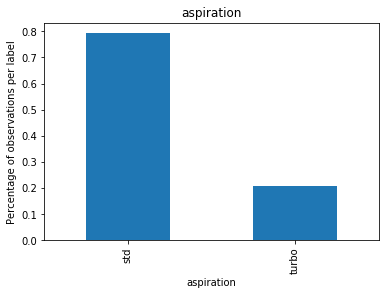

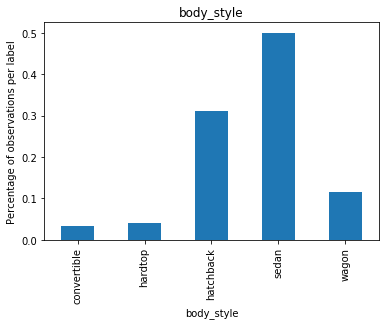

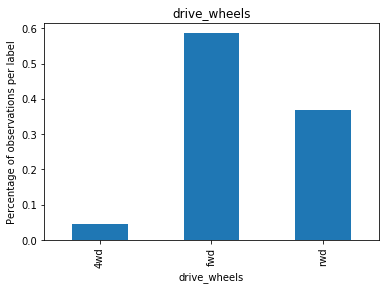

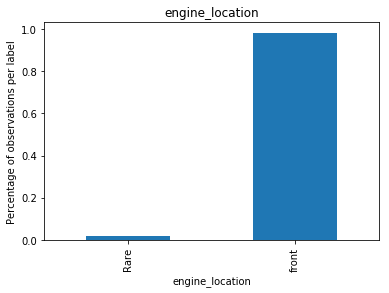

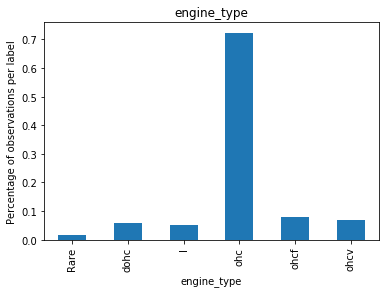

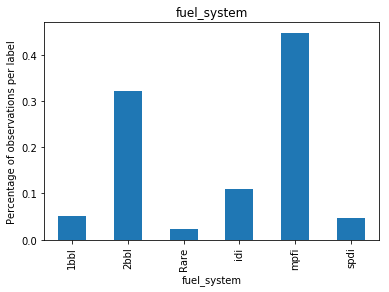

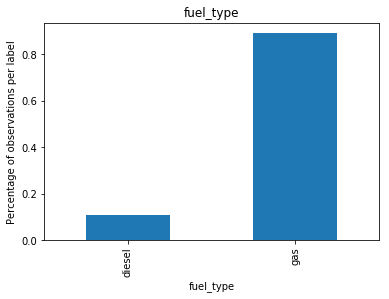

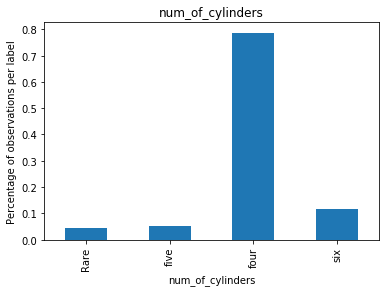

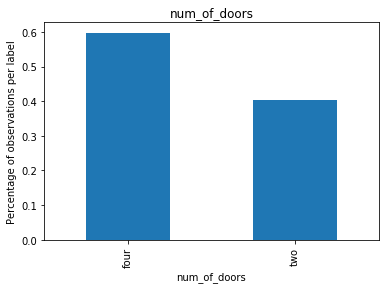

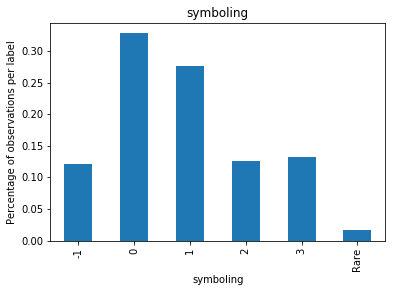

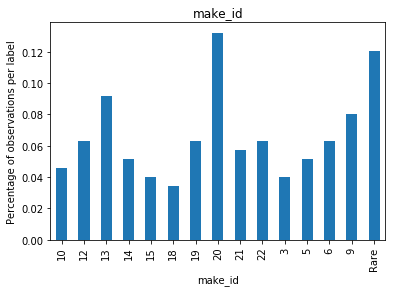

In [80]:
# let's check that it worked
for var in categorical:
    (X_train.groupby(var)[var].count() / np.float(len(X_train))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

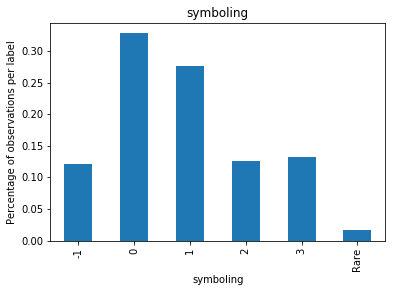

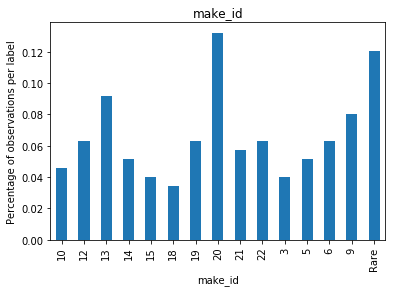

In [81]:
# let's check that it worked
for var in discrete:
    (X_train.groupby(var)[var].count() / np.float(len(X_train))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

YES! It did work well!

### 10. Encoding Categorical Variables

I will use target encoding


In [82]:
def encode_categorical_variables(var, target):
        # make label to price dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)

# encode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'price')
    
# encode labels in discrete vars
for var in discrete:
    encode_categorical_variables(var, 'price')

In [83]:
#let's inspect the dataset
X_train.head()

,aspiration,body_style,bore,city_mpg,curb_weight,drive_wheels,engine_location,engine_size,engine_type,fuel_system,fuel_type,height,highway_mpg,length,make_id,normalized_losses,num_of_cylinders,num_of_doors,peak_rpm,price,symboling,width,normalized_losses_NA,stroke_ordered,horsepower_ordered,compression_ratio_ordered,wheel_base_ordered,widht
193,12844.206522,12037.050000,3.19,25,2563,9373.348039,13185.830409,109,11773.261905,18257.185897,13289.948387,55.1,31.0,183.1,10296.000000,114.0,10444.281022,13634.740385,5500.0,12290.0,14640.078947,66.9,1,13066.343750,8843.363636,11295.254902,14538.28125,66.9
125,12844.206522,10194.361111,3.94,19,2778,20587.546875,13185.830409,151,11773.261905,18257.185897,13289.948387,50.2,27.0,168.9,19875.285714,186.0,10444.281022,13433.542857,5500.0,22018.0,17864.086957,68.3,0,15010.613636,17661.605263,12200.340909,9203.42500,68.3
173,12844.206522,14589.798851,3.31,29,2326,9373.348039,13185.830409,122,11773.261905,18257.185897,13289.948387,54.9,34.0,175.6,9659.956522,65.0,10444.281022,13634.740385,4200.0,8948.0,17405.952381,66.5,0,12370.062500,12346.285714,11295.254902,18111.43750,66.5
92,12844.206522,14589.798851,3.15,31,1938,9373.348039,13185.830409,97,11773.261905,7656.026786,13289.948387,54.5,37.0,165.3,10299.000000,122.0,10444.281022,13634.740385,5200.0,6849.0,9753.031250,63.8,0,11270.125000,7461.500000,12200.340909,9203.42500,63.8
16,12844.206522,14589.798851,3.62,16,3380,20587.546875,13185.830409,209,11773.261905,18257.185897,13289.948387,53.7,22.0,193.8,26854.285714,114.0,24910.350000,13433.542857,5400.0,41315.0,14640.078947,67.9,1,17316.400000,30801.812500,17305.815217,18111.43750,67.9


### 11.Feature Scaling

In [84]:
# Check before it is all numerical
X_train.dtypes

aspiration                   float64
body_style                   float64
bore                         float64
city_mpg                       int64
curb_weight                    int64
drive_wheels                 float64
engine_location              float64
engine_size                    int64
engine_type                  float64
fuel_system                  float64
fuel_type                    float64
height                       float64
highway_mpg                  float64
length                       float64
make_id                      float64
normalized_losses            float64
num_of_cylinders             float64
num_of_doors                 float64
peak_rpm                     float64
price                        float64
symboling                    float64
width                        float64
normalized_losses_NA           int64
stroke_ordered               float64
horsepower_ordered           float64
compression_ratio_ordered    float64
wheel_base_ordered           float64
w

In [85]:
# Check before it is all numerical
X_test.dtypes

aspiration                   float64
body_style                   float64
bore                         float64
city_mpg                       int64
curb_weight                    int64
drive_wheels                 float64
engine_location              float64
engine_size                    int64
engine_type                  float64
fuel_system                  float64
fuel_type                    float64
height                       float64
highway_mpg                  float64
length                       float64
make_id                      float64
normalized_losses            float64
num_of_cylinders             float64
num_of_doors                 float64
peak_rpm                     float64
price                        float64
symboling                    float64
width                        float64
normalized_losses_NA           int64
stroke_ordered               float64
horsepower_ordered           float64
compression_ratio_ordered    float64
wheel_base_ordered           float64
w

In [86]:
#Find column names
X_train.columns

Index(['aspiration', 'body_style', 'bore', 'city_mpg', 'curb_weight',
       'drive_wheels', 'engine_location', 'engine_size', 'engine_type',
       'fuel_system', 'fuel_type', 'height', 'highway_mpg', 'length',
       'make_id', 'normalized_losses', 'num_of_cylinders', 'num_of_doors',
       'peak_rpm', 'price', 'symboling', 'width', 'normalized_losses_NA',
       'stroke_ordered', 'horsepower_ordered', 'compression_ratio_ordered',
       'wheel_base_ordered', 'widht'],
      dtype='object')

In [87]:
# let's create a list of the training variables
training_vars = ['aspiration', 'body_style', 'bore', 'city_mpg', 'curb_weight',
       'drive_wheels', 'engine_location', 'engine_size', 'engine_type',
       'fuel_system', 'fuel_type', 'height', 'highway_mpg', 'length',
       'make_id', 'normalized_losses', 'num_of_cylinders', 'num_of_doors',
       'peak_rpm', 'price', 'symboling', 'width', 'normalized_losses_NA',
       'stroke_ordered', 'horsepower_ordered', 'compression_ratio_ordered',
       'wheel_base_ordered', 'widht']

print('total number of variables to use for training: ', len(training_vars))

total number of variables to use for training:  28


In [88]:
# let's find the skewness of above variables
for var in training_vars:
    print(var, 'skewness is', df[var].skew() )

aspiration skewness is 5.5677643628300215
body_style skewness is 2.2846623412884255
bore skewness is 0.527700822150885
city_mpg skewness is 1.0403231549722474
curb_weight skewness is 0.2120018148039922
drive_wheels skewness is 0.4829064772716164
engine_location skewness is 0
engine_size skewness is 0.5635017615197339
engine_type skewness is 2.868683399748382
fuel_system skewness is -0.27588835177803833
fuel_type skewness is 5.567764362830074
height skewness is 0.27350172478135837
highway_mpg skewness is 0.954946036021284
length skewness is -0.16070860345381996
make_id skewness is 1.1874675504165326
normalized_losses skewness is 0.8716855672848831
num_of_cylinders skewness is 1.1198901422468581
num_of_doors skewness is 0.4874994082774718
peak_rpm skewness is -0.15997438759248278
price skewness is 0.6255002331118181
symboling skewness is 0.4544326061084143
width skewness is 0.8650397680572235
normalized_losses_NA skewness is 0.9715255657145386
stroke_ordered skewness is 0
horsepower_orde

OK, I shall do :
   - Robust Scaling for variables with an absolute skew above 2
   - MinMax Scaling for variables with an absoulute skew between 1 and 2
   - Standard for the rest

In [89]:
for var in training_vars:
    max_abs_value = 2
    if abs(df[var].skew()) >= max_abs_value:
        print (var)
    

aspiration
body_style
engine_type
fuel_type


In [90]:
# I Will start with Robust Scaling
scalerR = RobustScaler() # call the object
X_train_scaledR = scalerR.fit_transform(X_train[['aspiration', 'body_style', 'engine_type', 'fuel_type']]) # fit the scaler to the train set, and then scale it
X_test_scaledR= scalerR.transform(X_test[['aspiration', 'body_style', 'engine_type', 'fuel_type']]) # scale the test set

In [91]:
for var in training_vars:
    max_abs_value = 2 
    if (1 <= abs(df[var].skew()) <=2):  
        print (var)

city_mpg
make_id
num_of_cylinders


In [92]:
#Continue with MinMax Scaling
scalerMM = MinMaxScaler() # create an instance

X_train_scaledMM= scalerMM.fit_transform(X_train[['num_of_cylinders','make_id','city_mpg']]) #  fit  the scaler to the train set and then transform it
X_test_scaledMM= scalerMM.transform(X_test[['num_of_cylinders','make_id','city_mpg']]) # transform (scale) the test set



In [93]:
for var in training_vars:
    max_abs_value = 2 
    if ((df[var].skew()) <=1):  
        print (var)

bore
curb_weight
drive_wheels
engine_location
engine_size
fuel_system
height
highway_mpg
length
normalized_losses
num_of_doors
peak_rpm
price
symboling
width
normalized_losses_NA
stroke_ordered
horsepower_ordered
compression_ratio_ordered
wheel_base_ordered
widht


In [94]:
# Normal Standarization
scalerN = StandardScaler() # create an object
X_train_scaledN = scalerN.fit_transform(X_train[['bore',
'curb_weight',
'drive_wheels',
'engine_location',
'engine_size',
'fuel_system',
'height',
'highway_mpg',
'length',
'normalized_losses',
'num_of_doors',
'peak_rpm',
'symboling',
'width',
'normalized_losses_NA',
'stroke_ordered',
'horsepower_ordered',
'compression_ratio_ordered',
'wheel_base_ordered',
'widht' ]]) # fit the scaler to the train set, and then transform it
X_test_scaledN = scalerN.transform(X_test[['bore',
'curb_weight',
'drive_wheels',
'engine_location',
'engine_size',
'fuel_system',
'height',
'highway_mpg',
'length',
'normalized_losses',
'num_of_doors',
'peak_rpm',
'symboling',
'width',
'normalized_losses_NA',
'stroke_ordered',
'horsepower_ordered',
'compression_ratio_ordered',
'wheel_base_ordered',
'widht']]) # transform the test set

### 11. Sanity check (nulls)

In [95]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [96]:
X_train.isnull().sum()

aspiration                   0
body_style                   0
bore                         0
city_mpg                     0
curb_weight                  0
drive_wheels                 0
engine_location              0
engine_size                  0
engine_type                  0
fuel_system                  0
fuel_type                    0
height                       0
highway_mpg                  0
length                       0
make_id                      0
normalized_losses            0
num_of_cylinders             0
num_of_doors                 0
peak_rpm                     0
price                        0
symboling                    0
width                        0
normalized_losses_NA         0
stroke_ordered               0
horsepower_ordered           0
compression_ratio_ordered    0
wheel_base_ordered           0
widht                        0
dtype: int64

In [97]:
X_test.isnull().sum()

aspiration                   0
body_style                   0
bore                         0
city_mpg                     0
curb_weight                  0
drive_wheels                 0
engine_location              0
engine_size                  0
engine_type                  0
fuel_system                  0
fuel_type                    0
height                       0
highway_mpg                  0
length                       0
make_id                      0
normalized_losses            0
num_of_cylinders             0
num_of_doors                 0
peak_rpm                     0
price                        0
symboling                    0
width                        0
normalized_losses_NA         0
stroke_ordered               0
horsepower_ordered           0
compression_ratio_ordered    0
wheel_base_ordered           0
widht                        0
dtype: int64

In [98]:
y_train.isnull().sum()

price    2
dtype: int64

In [99]:
y_test.isnull().sum()

price    2
dtype: int64

In [100]:
y_train['price'].describe()

count      172.000000
mean     13587.604651
std       8320.024245
min       5195.000000
25%       7784.750000
50%      10646.500000
75%      16525.750000
max      45400.000000
Name: price, dtype: float64

In [101]:
y_train['price'].fillna(10646.5, inplace = True)

In [102]:
y_train['price'].isnull().sum()

0

In [103]:
y_test['price'].describe()

count       29.000000
mean     10950.517241
std       4711.299795
min       5118.000000
25%       6938.000000
50%       9959.000000
75%      15580.000000
max      20970.000000
Name: price, dtype: float64

In [104]:
y_test['price'].fillna(9959, inplace = True)

In [105]:
y_train['price'].isnull().sum()

0

In [106]:
y_test['price'].isnull().sum()

0

### 12. Save selected variables for features predictions

In [107]:
X_train_scaledR = pd.DataFrame(X_train_scaledR, columns = ['aspiration', 'body_style', 'engine_type', 'fuel_type'])
X_train_scaledMM = pd.DataFrame(X_train_scaledMM, columns = ['num_of_cylinders','make_id','city_mpg'])
X_train_scaledN = pd.DataFrame(X_train_scaledN, columns = ['bore',
'curb_weight',
'drive_wheels',
'engine_location',
'engine_size',
'fuel_system',
'height',
'highway_mpg',
'length',
'normalized_losses',
'num_of_doors',
'peak_rpm',
'symboling',
'width',
'normalized_losses_NA',
'stroke_ordered',
'horsepower_ordered',
'compression_ratio_ordered',
'wheel_base_ordered',
'widht'])

######
X_test_scaledR = pd.DataFrame(X_test_scaledR, columns = ['aspiration', 'body_style', 'engine_type', 'fuel_type'])
X_test_scaledMM = pd.DataFrame(X_test_scaledMM, columns = ['num_of_cylinders','make_id','city_mpg'])
X_test_scaledN = pd.DataFrame(X_test_scaledN, columns = ['bore',
'curb_weight',
'drive_wheels',
'engine_location',
'engine_size',
'fuel_system',
'height',
'highway_mpg',
'length',
'normalized_losses',
'num_of_doors',
'peak_rpm',
'symboling',
'width',
'normalized_losses_NA',
'stroke_ordered',
'horsepower_ordered',
'compression_ratio_ordered',
'wheel_base_ordered',
'widht'])

In [108]:
X_train = pd.concat([X_train_scaledR, X_train_scaledMM, X_train_scaledN], axis=1)
X_test = pd.concat([X_test_scaledR, X_test_scaledMM, X_test_scaledN], axis=1)



In [109]:
X_train.head()

,aspiration,body_style,engine_type,fuel_type,num_of_cylinders,make_id,city_mpg,bore,curb_weight,drive_wheels,engine_location,engine_size,fuel_system,height,highway_mpg,length,normalized_losses,num_of_doors,peak_rpm,symboling,width,normalized_losses_NA,stroke_ordered,horsepower_ordered,compression_ratio_ordered,wheel_base_ordered,widht
0,0.0,-0.580772,0.0,0.0,0.000000,0.093924,0.333333,-0.550694,-0.021960,-0.778344,-0.132453,-0.444750,0.965406,0.529179,0.069328,0.698583,-0.181097,0.820413,0.784944,0.346142,0.453360,2.106537,-0.169365,-0.687669,-0.879240,0.185701,0.453360
1,0.0,-1.000000,0.0,0.0,0.000000,0.465623,0.166667,2.156108,0.386956,1.309589,-0.132453,0.536008,0.965406,-1.461019,-0.512024,-0.459224,2.150649,-1.218899,0.784944,1.373468,1.117853,-0.474713,0.506168,0.599692,-0.526895,-0.820603,1.117853
2,0.0,0.000000,0.0,0.0,0.000000,0.069243,0.444444,-0.117606,-0.472718,-0.778344,-0.132453,-0.141182,0.965406,0.447946,0.505342,0.087065,-1.767980,0.820413,-1.901203,1.227484,0.263506,-0.474713,-0.411287,-0.176283,-0.879240,0.859699,0.263506
3,0.0,0.000000,0.0,0.0,0.000000,0.094040,0.500000,-0.695057,-1.210668,-0.778344,-0.132453,-0.724967,-1.210562,0.285481,0.941356,-0.752753,0.077985,0.820413,0.165064,-1.211110,-1.018015,-0.474713,-0.793459,-0.889405,-0.526895,-0.820603,-1.018015
4,0.0,0.000000,0.0,0.0,0.775761,0.736426,0.083333,1.001206,1.531919,1.309589,-0.132453,1.890389,0.965406,-0.039449,-1.238715,1.571016,-0.181097,-1.218899,0.578317,0.346142,0.927998,2.106537,1.307310,2.518011,1.460642,0.859699,0.927998


In [110]:
X_train = pd.DataFrame(X_train)
X_train.to_csv('X_train.csv', index=False)

In [111]:
X_test = pd.DataFrame(X_test)
X_test.to_csv('X_test.csv', index=False)

X_test.head()

,aspiration,body_style,engine_type,fuel_type,num_of_cylinders,make_id,city_mpg,bore,curb_weight,drive_wheels,engine_location,engine_size,fuel_system,height,highway_mpg,length,normalized_losses,num_of_doors,peak_rpm,symboling,width,normalized_losses_NA,stroke_ordered,horsepower_ordered,compression_ratio_ordered,wheel_base_ordered,widht
0,0.0,-1.000000,0.000000,0.0,0.000000,0.096338,0.500000,-1.128145,-1.273431,-0.778344,-0.132453,-0.865075,-1.210562,0.123016,1.086694,-1.258275,-0.504951,-1.218899,-0.248189,-1.211110,-0.828160,-0.474713,0.506168,-0.927738,-0.879240,-0.592607,-0.828160
1,0.0,-0.580772,2.631301,0.0,0.775761,0.069243,0.166667,-0.261969,1.096377,1.309589,-0.132453,0.769522,0.965406,0.123016,-0.948038,1.081801,-0.181097,0.820413,0.165064,1.227484,0.263506,2.106537,0.506168,-0.927738,-1.625007,-0.592607,0.263506
2,0.0,0.000000,0.000000,0.0,0.611065,0.465623,0.166667,-0.550694,-0.128468,-0.778344,-0.132453,0.185738,0.965406,-0.283147,-0.802700,0.225676,-0.181097,-1.218899,0.784944,-0.958794,0.168578,2.106537,0.506168,-0.927738,1.460642,-0.592607,0.168578
3,0.0,-1.000000,1.383807,0.0,1.000000,0.465623,0.944444,-1.561233,-2.066537,-0.778344,-0.132453,-1.565617,-1.210562,-0.242531,3.266765,-2.725918,0.045600,-1.218899,-0.041563,-0.958794,-2.679246,-0.474713,0.506168,-0.927738,-0.526895,-0.592607,-2.679246
4,0.0,0.000000,0.000000,0.0,0.000000,0.093924,0.361111,-0.550694,-0.522168,-0.778344,-0.132453,-0.444750,0.965406,0.772876,0.214666,-0.230924,-0.828805,0.820413,0.784944,-0.958794,-0.211132,-0.474713,0.506168,-0.927738,0.469621,-0.592607,-0.211132


In [112]:
y_train = pd.DataFrame(y_train)
y_train.to_csv('y_train.csv', index=False)

y_train.head()

,price
193,12290.0
125,22018.0
173,8948.0
92,6849.0
16,41315.0


In [113]:
y_test = pd.DataFrame(y_test)
y_test.to_csv('y_test.csv', index=False)